Lastly, we would like to plot the prices information on a map, ideally interactive map;

We need to extract latitude (Lat) and longitude (Lon) information from our downloaded data;

With the Lat/Lon information we can then plot the resale prices on the map using the prices per square meters.

In [77]:
import numpy as np
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

In [3]:
loca_keys = ['Lat','Lon']
df = pd.read_pickle("data_w_postal.pkl")

In [7]:
df['Price_per_sqm'] = df['resale_price']/df['floor_area_sqm']

In [8]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Postal_code,Price_per_sqm
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,560406,5272.727273
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,560108,3731.343284
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,560602,3910.447761
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,560465,3897.058824
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,560601,3955.223881


In [18]:
# We would like to create a dictionary using postal code as key and each key maps to a different dictionary using Lat and Lon as key, storing Latitude and Longitude for that postal code location

postal_lat = defaultdict()
postal_lon = defaultdict()
url_used = []
house_info = []
failure = []

with open('success_house.txt','r') as f:
    for line in f:
        try:
            details = json.loads(line.split('"text":')[1][:-2])
            house_info.append(details)
            key = details['results'][0]['POSTAL']
            lat = details['results'][0]["LATITUDE"]
            lon = details['results'][0]["LONGITUDE"]
            postal_lat[key] = lat
            postal_lon[key] = lon
            url = line.split('"text":')[0][8:-2]
            url_used.append(url)
        except IndexError:
            url = line.split('"text":')[0][8:-2]
            failure.append(url)
        

In [54]:
postal_code_fix = ['680215','540238','730721','730729','730749','330097']
lat_fix =  [1.38289363072178,1.3904401,1.4440970,1.4425905,1.4445346,1.3237486]
lon_fix = [103.747120904492,103.8986640,103.8004046,103.7985808,103.7944690,103.8702439]

In [55]:
for key,lat,lon in zip(postal_code_fix,lat_fix,lon_fix):
    postal_lat[key] = lat
    postal_lon[key] = lon

In [53]:
sorted(list(df.Lat.unique()))[-10:]

[1.4564248630540901,
 1.45648173153252,
 1.45654601332376,
 1.4566576383969299,
 330097.0,
 540238.0,
 680215.0,
 730721.0,
 730729.0,
 730749.0]

In [56]:
df['Lat'] = df['Postal_code'].replace(postal_lat)

In [57]:
df['Lon'] = df['Postal_code'].replace(postal_lon)

In [58]:
df.Lat = df.Lat.astype(float)
df.Lon = df.Lon.astype(float)

In [59]:
ylim = (min(df.Lat),max(df.Lat))
xlim = (min(df.Lon),max(df.Lon))

In [60]:
ylim

(1.2703795117581598, 1.4566576383969299)

In [61]:
xlim

(103.68522841782499, 103.987804503483)

In [68]:
len_xlim = xlim[1]-xlim[0]
len_ylim = ylim[1]-ylim[0]

In [70]:
len_xlim/len_ylim

1.624324289264366

In [ ]:

cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['$0$','$1$','$2$','$>3$']):
    cbar.ax.text(.5, (2 * j + 1) / 8.0, lab, ha='center', va='center')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('# of contacts', rotation=270)


# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()

<IPython.core.display.Javascript object>


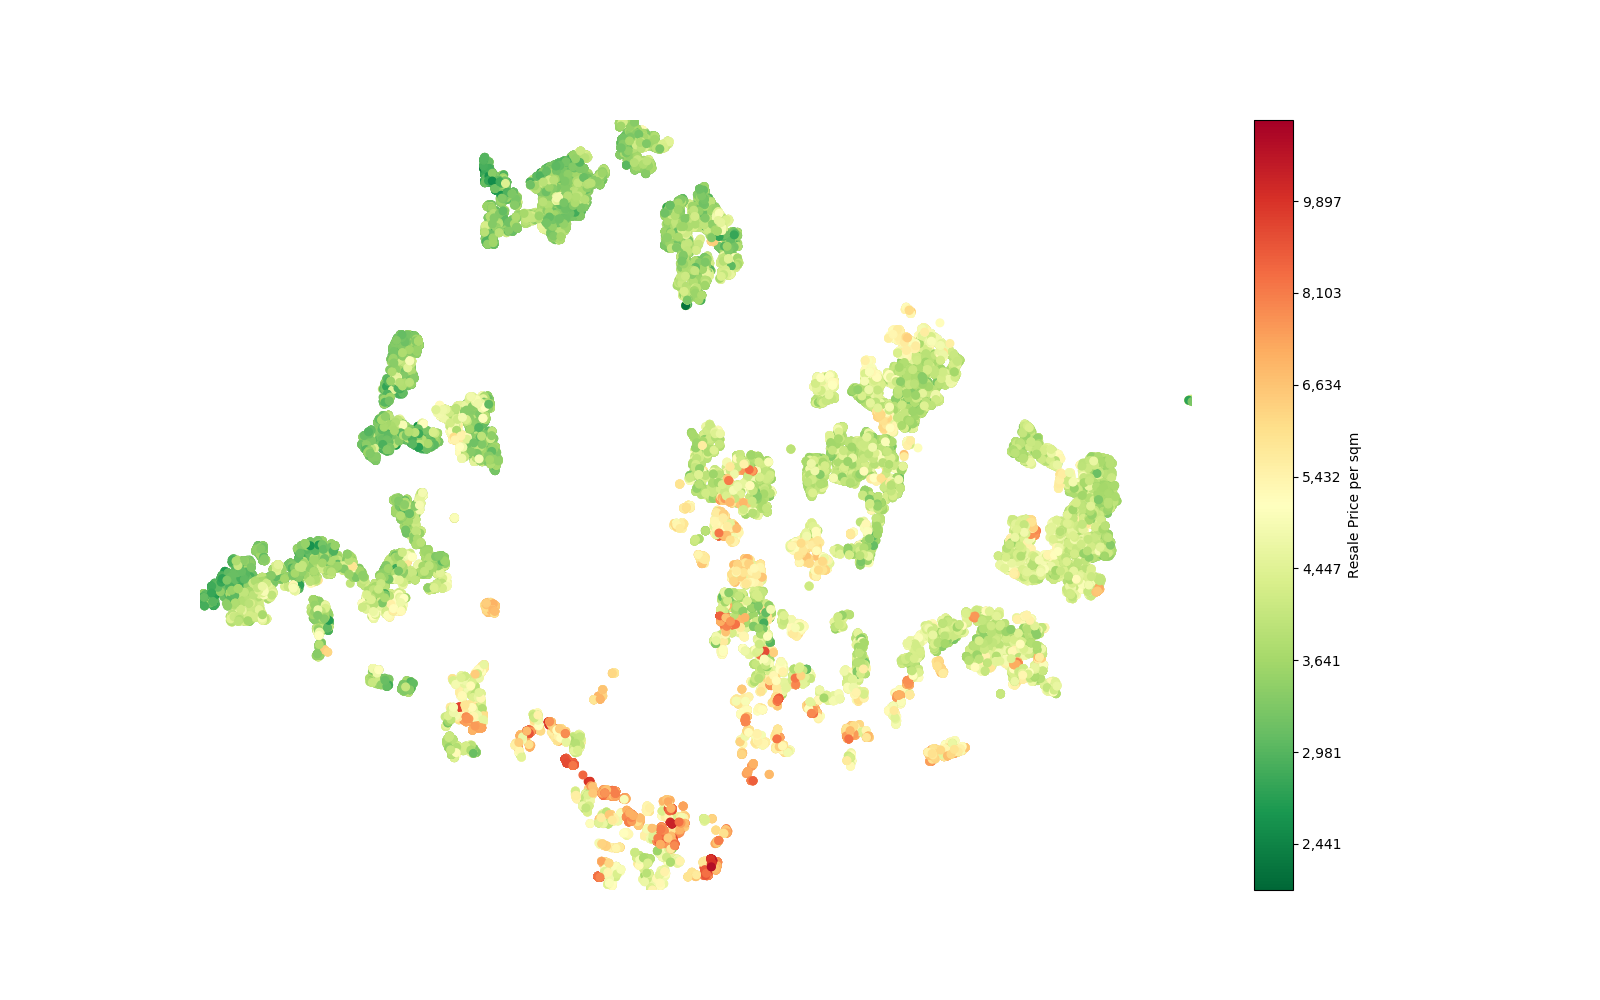

Text(0, 0.5, 'Resale Price per sqm')

In [90]:
# Plot using latitude as y and longitude as x

cmap = matplotlib.cm.RdYlGn_r # replace with your favourite colormap 
fig, ax = plt.subplots(figsize=(16,10))
s = ax.scatter(df.Lon, df.Lat, s=30,c=np.log(df.Price_per_sqm), cmap=cmap)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_frame_on(False)
ax.set_yticklabels("")
ax.set_xticklabels("")
ax.tick_params(axis = u'both', which=u'both',length=0)

#Adding color bar 
cbar = fig.colorbar(s)
cbar.ax.set_yticklabels(bar_labels)
cbar.ax.set_ylabel('Resale Price per sqm')

In [80]:
bar_label = [7.8,8,8.2,8.4,8.6,8.8,9,9.2]

In [82]:
bar_label_e = [np.e**num for num in bar_label]

In [88]:
bar_labels = ["{:,.0f}".format(num) for num in bar_label_e]

In [ ]:
#try to use GEOPY overlay the scatter plot with shape file